In [ ]:
!pip install pandas matplotlib seaborn plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('coffee_sales.csv')

In [ ]:
print(df.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


**DATA EXPLORATION**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


**HANDLING MISSING VALUES**

In [ ]:
print(df.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [ ]:
df['card'].fillna(df['card'].mode()[0], inplace=True)

/tmp/ipython-input-12-3745137589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna(df['card'].mode()[0], inplace=True)


**CONVERTING DATA TYPES**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
print(df.dtypes)

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
Timestamp      datetime64[ns]
Hour                    int32
Day                    object
Date                   object
Month                  object
dtype: object


**DATA CLEANING**

In [ ]:
df['Timestamp'] = pd.to_datetime(df['datetime'])

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.month_name()

**EDA (Exploratory Data Analysis)**

1. Most popular coffee type

/tmp/ipython-input-23-3854556372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='magma')


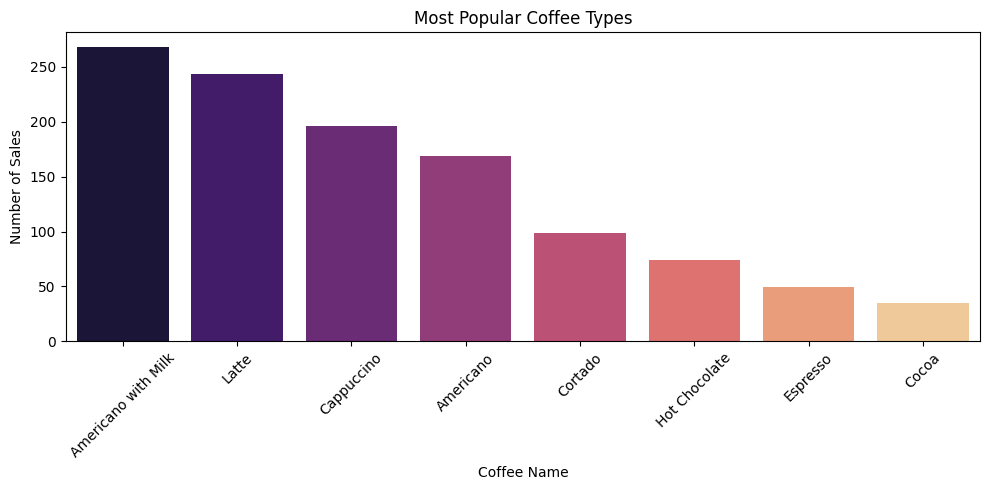

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='magma')
plt.title("Most Popular Coffee Types")
plt.ylabel("Number of Sales")
plt.xlabel("Coffee Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Sales per hour of the day

/tmp/ipython-input-24-3851773093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


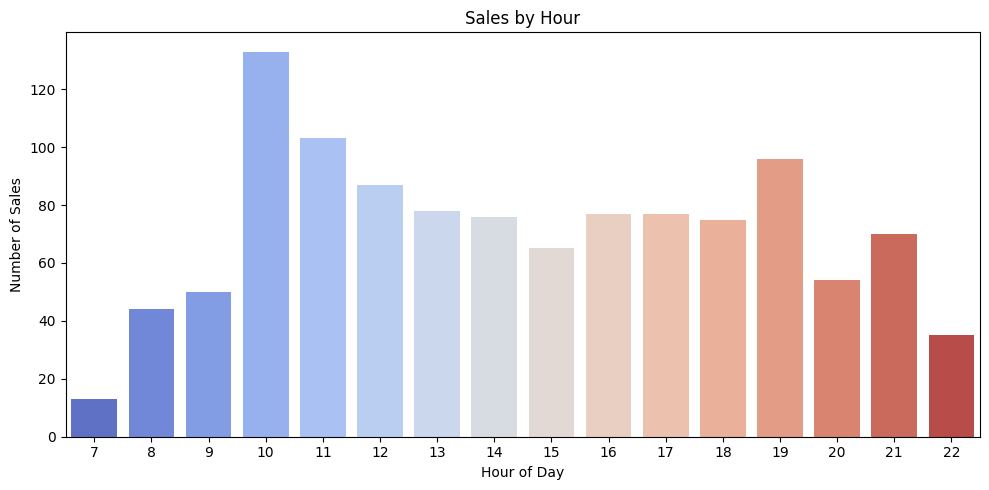

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

3. Sales per day of the week

/tmp/ipython-input-25-1158265977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')


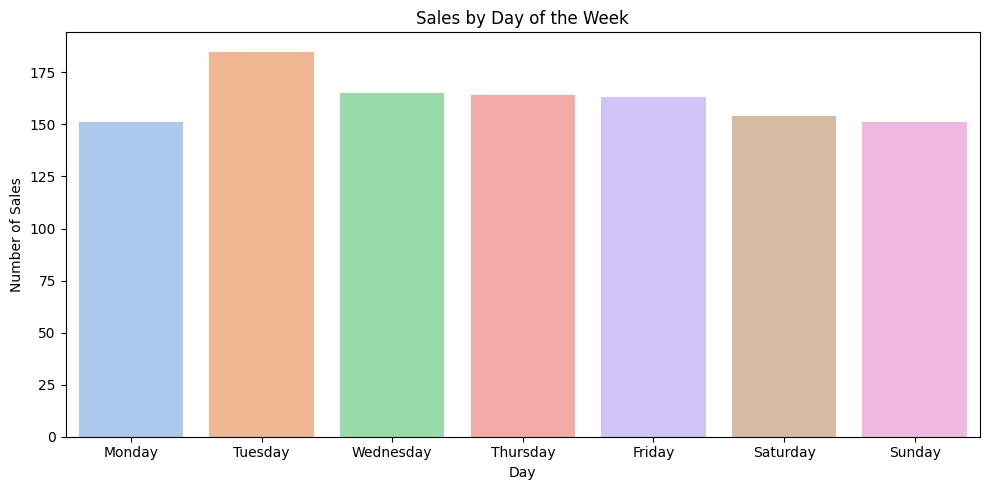

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

 4. Total Money Collected per Coffee Type

/tmp/ipython-input-26-2570281667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_revenue.index, y=coffee_revenue.values, palette='viridis')


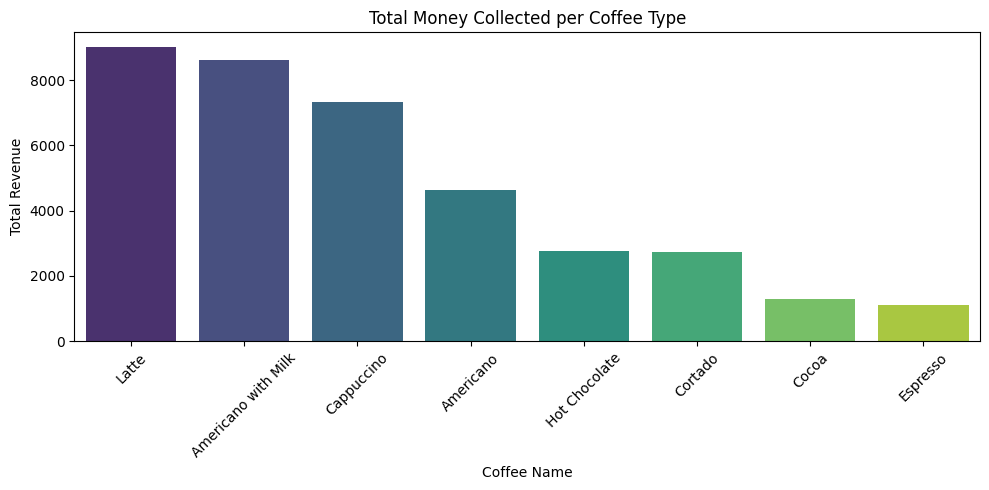

In [ ]:
coffee_revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=coffee_revenue.index, y=coffee_revenue.values, palette='viridis')
plt.title("Total Money Collected per Coffee Type")
plt.ylabel("Total Revenue")
plt.xlabel("Coffee Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Heatmap of Sales by Hour & Day

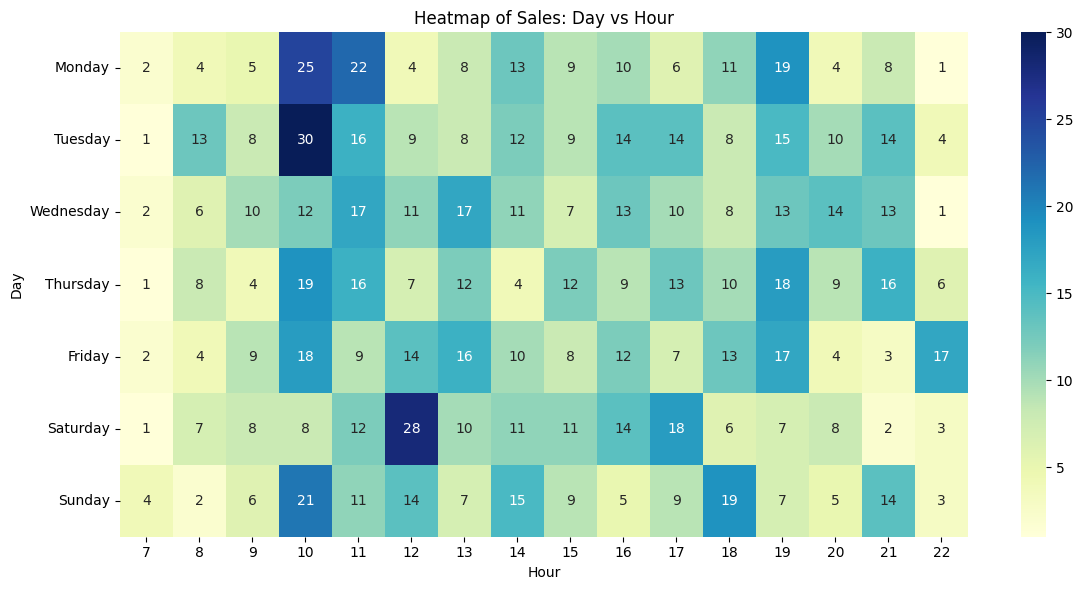

In [ ]:
heatmap_data = df.groupby(['Day', 'Hour']).size().unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Sales: Day vs Hour")
plt.ylabel("Day")
plt.xlabel("Hour")
plt.tight_layout()
plt.show()

6. Daily Revenue Trend

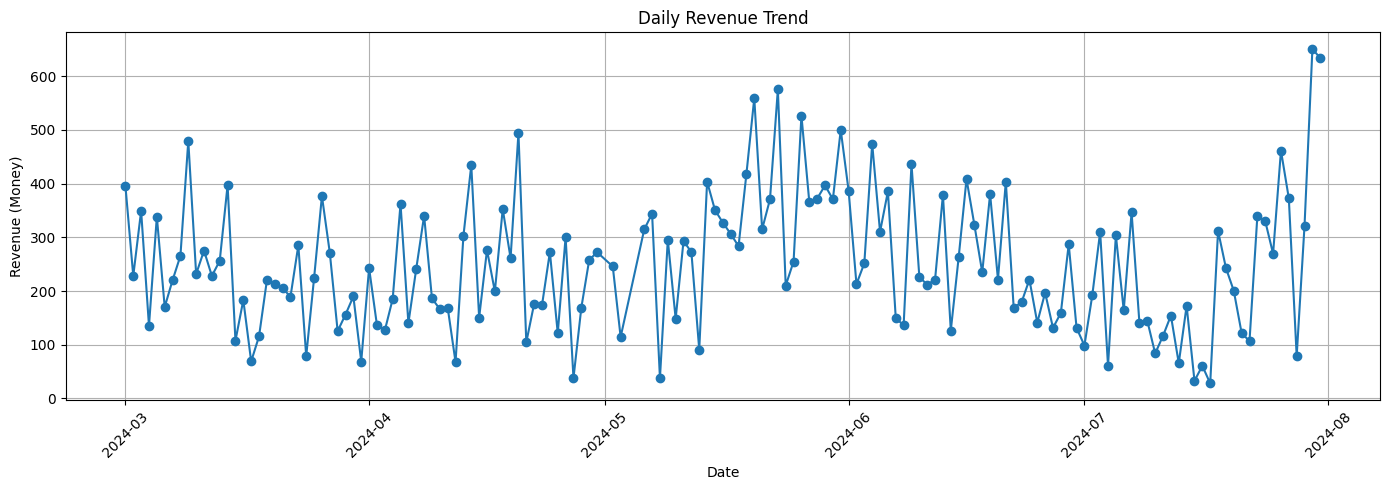

In [ ]:
daily_revenue = df.groupby('Date')['money'].sum()

plt.figure(figsize=(14,5))
daily_revenue.plot(marker='o')
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue (Money)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()